## RNN 모델을 이용한 영화리뷰 분류 분석

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
print(tf.__version__)

2.2.0-rc3


### Step 1-1. Input tensor 와 Target tensor 준비(훈련데이터)
* IMDB 영화 리뷰 데이터 down

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
len(input_train), len(input_test)

(25000, 25000)

In [ ]:
input_train.shape

(25000,)

In [ ]:
print(input_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


### Step 1-2. 입력 데이터의 전처리 
* RNN 모델에 데이터를 입력하기 위해 시퀀스 데이터의 길이를 통일

In [ ]:
input_train = sequence.pad_sequences(input_train, 800)
input_test = sequence.pad_sequences(input_test, 800)

In [ ]:
input_train.shape, input_test.shape

((25000, 800), (25000, 800))

In [ ]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### Step2. RNN 모델 디자인

In [ ]:
# embedding layer: 32차원, hidden layer : 1개[32], activation : tanh
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=32))
model.add(layers.SimpleRNN(units=32))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### Step 3. 모델의 학습 정보 설정

In [ ]:
# loss : binary crossentropy/ optimizer : rmsprop/ metric : accuracy
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics='acc')

### Step 4. 모델에 input, target 데이터 연결 후 학습

In [ ]:
# batch size : 128, epochs : 10, validation data set percent : 20%
history = model.fit(
    x=input_train, y=y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 36s 231ms/step - loss: 0.6109 - acc: 0.6500 - val_loss: 0.4862 - val_acc: 0.7886
Epoch 2/10
157/157 [==============================] - 36s 228ms/step - loss: 0.3830 - acc: 0.8402 - val_loss: 0.3886 - val_acc: 0.8322
Epoch 3/10
157/157 [==============================] - 36s 228ms/step - loss: 0.2840 - acc: 0.8887 - val_loss: 0.3619 - val_acc: 0.8456
Epoch 4/10
157/157 [==============================] - 35s 226ms/step - loss: 0.2310 - acc: 0.9101 - val_loss: 0.3995 - val_acc: 0.8268
Epoch 5/10
157/157 [==============================] - 36s 228ms/step - loss: 0.1719 - acc: 0.9366 - val_loss: 0.4592 - val_acc: 0.8152
Epoch 6/10
157/157 [==============================] - 36s 229ms/step - loss: 0.1464 - acc: 0.9473 - val_loss: 0.4854 - val_acc: 0.8240
Epoch 7/10
157/157 [==============================] - 37s 233ms/step - loss: 0.0983 - acc: 0.9678 - val_loss: 0.4645 - val_acc: 0.8392
Epoch 8/10
157/157 [==============================] - 3

### 학습과정의 시각화 및 성능 테스트

In [ ]:
# 학습과정 시각화를 위한 정보 추출
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# 차트의 x 축을 위한 epoch 정보 생성
epochs = range(1, len(acc) + 1)

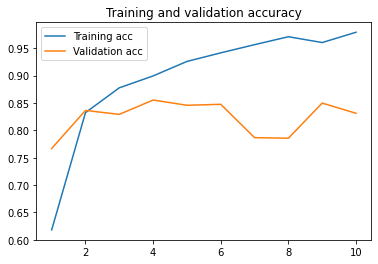

In [ ]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

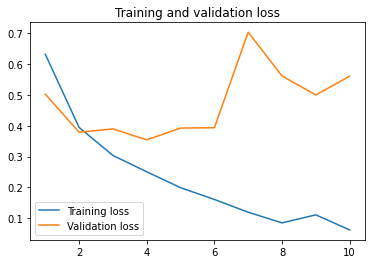

In [ ]:
# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 테스트 데이터 셋을 통한 성능 측정
test_loss, test_acc = model.evaluate(x=input_test, y=y_test)

782/782 [==============================] - 23s 29ms/step - loss: 0.6293 - acc: 0.8244
